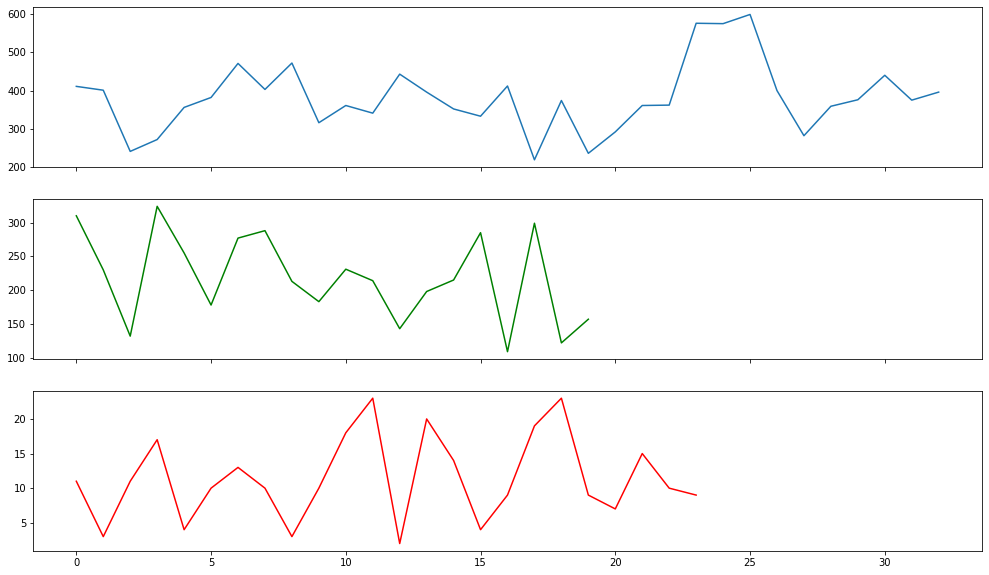


 Mean values:
 Confirmed daily          358.225
Recovered                246.500
Official deaths daily     13.600
dtype: float64

 Mean values:
 Confirmed daily          418.2
Recovered                207.9
Official deaths daily     13.0
dtype: float64


[576.0, 575.0, 599.0, 400.0, 282.0, 359.0, 376.0, 440, 375, 396]

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("covid19.csv")
data = data.fillna(0)
data = data.drop(["Source","Unofficial deaths daily"], axis = 1)
data_train = data[["Confirmed daily", "Recovered", "Official deaths daily"]]
data_train = data_train.iloc[-40:,:]

R_obs_w = list(data_train["Confirmed daily"]) + [440, 375, 396]
O_obs_w = list(data_train["Recovered"]) + [299, 122, 157]
Z_obs_w = list(data_train["Official deaths daily"]) + [15,10, 9] # łącznie z 14 czerwca
O_obs_w = O_obs_w[23:]
R_obs_w = R_obs_w[10:]
Z_obs_w= Z_obs_w[19:]
fig, axes = plt.subplots(3,1, sharex=True, figsize=(17, 10))
axes[0].plot(range(len(R_obs_w)), R_obs_w )
axes[1].plot(range(len(O_obs_w)), O_obs_w ,"g")
axes[2].plot(range(len(Z_obs_w)), Z_obs_w, "r" )
plt.show()

print("\n Mean values:\n",data_train.mean())
print("\n Mean values:\n",data_train.iloc[-10:,:].mean())

R_obs_w[-10:]

In [24]:
from pmdarima.arima import auto_arima
stepwise_model_R = auto_arima(R_obs_w, start_p=1, start_q=1,
                           max_p=3, max_q=3,max_d=2, m=7,
                           start_P=0, start_Q = 0,max_D = 2, seasonal=True,
                           D=1,d = 1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=False, n_jobs= -1, maxiter = 200)
print("\n",stepwise_model_R)
print("\n",stepwise_model_R.aicc())
stepwise_model_Z = auto_arima(Z_obs_w,  start_p=1, start_q=1,
                           max_p=3, max_q=3,max_d=2, m=7,
                           start_P=0, start_Q = 0,max_D = 2, seasonal=True,
                           D=1,d = 1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=False, n_jobs= -1, maxiter = 200)
print("\n",stepwise_model_Z)
print("\n",stepwise_model_Z.aicc())
stepwise_model_O = auto_arima(O_obs_w, start_p=1, start_q=1,
                           max_p=3, max_q=3,max_d=2, m=7,
                           start_P=0, start_Q = 0,max_D = 2, seasonal=True,
                           D=1,d = 1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=False, n_jobs= -1, maxiter = 200)
print("\n",stepwise_model_O)
print("\n",stepwise_model_O.aicc())

Total fit time: 3.207 seconds

 ARIMA(maxiter=200, method='lbfgs', order=(0, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 1, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

 305.0346398459262
Total fit time: 4.595 seconds

 ARIMA(maxiter=200, method='lbfgs', order=(0, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(2, 1, 0, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

 106.87512905121595
Total fit time: 4.155 seconds

 ARIMA(maxiter=200, method='lbfgs', order=(0, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

 131.70845890159228


ARIMA(maxiter=200, method='lbfgs', order=(0, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 1, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)
      Prediction
21.0  345.537222
22.0  293.099289
23.0  367.048453
24.0  378.212402
25.0  464.912233
26.0  409.800590
27.0  444.994748
28.0  358.773119
29.0  305.471866
30.0  370.542856
31.0  381.752195
32.0  468.497416
33.0  413.431163
34.0  448.670711
35.0  362.494472
36.0  309.238609
37.0  374.354988
38.0  385.609717
39.0  472.400328
40.0  417.379464
41.0  452.664403
42.0  366.533553
43.0  313.323080
44.0  378.484850
45.0  389.784968
46.0  476.620969
47.0  421.645495
48.0  456.975823
49.0  370.890364
50.0  317.725280


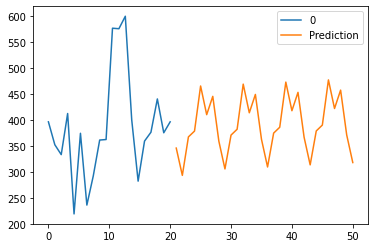

In [30]:
print(stepwise_model_R.fit(R_obs_w))
koniec = 20
future = 30
future_forecast = stepwise_model_R.predict(n_periods=future)
future_forecast = pd.DataFrame(future_forecast,index = np.linspace(koniec+1,koniec+future,future),columns=["Prediction"])
pd.concat([pd.DataFrame(R_obs_w[-koniec:],index = np.linspace(0,koniec,koniec)),future_forecast],axis=1).plot()

print(future_forecast)

      Prediction
21.0   22.061337
22.0    6.623004
23.0   16.126333
24.0    0.460673
25.0    9.942059
26.0    6.737451
27.0    7.009221
28.0   17.396564
29.0    2.791453
30.0    4.370554


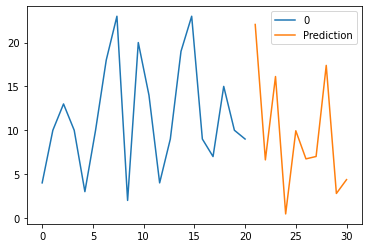

In [39]:
stepwise_model_Z.fit(Z_obs_w)
koniec = 20
future = 10
future_forecast = stepwise_model_Z.predict(n_periods=future)
future_forecast = pd.DataFrame(future_forecast,index = np.linspace(koniec+1,koniec+future,future),columns=["Prediction"])
pd.concat([pd.DataFrame(Z_obs_w[-koniec:],index = np.linspace(0,koniec,koniec)),future_forecast],axis=1).plot()

print(future_forecast)

      Prediction
20.0  179.086832
21.0  196.900635
22.0  267.714439
23.0   92.528243
24.0  283.342046
25.0  107.155850
26.0  142.969653
27.0  165.870289
28.0  184.497896
29.0  256.125503
30.0   81.753111
31.0  273.380718
32.0   98.008325
33.0  134.635932
34.0  158.350371
35.0  177.791782
36.0  250.233193
37.0   76.674604
38.0  269.116015
39.0   94.557426
40.0  131.998837
41.0  156.527079
42.0  176.782294
43.0  250.037509
44.0   77.292723
45.0  270.547938
46.0   96.803152
47.0  135.058367
48.0  160.400413
49.0  181.469431


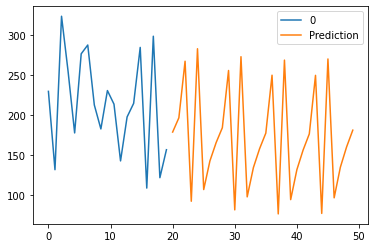

In [32]:
stepwise_model_O.fit(O_obs_w)
koniec = 19
future = 30
future_forecast = stepwise_model_O.predict(n_periods=future)
future_forecast = pd.DataFrame(future_forecast,index = np.linspace(koniec+1,koniec+future,future),columns=["Prediction"])
pd.concat([pd.DataFrame(O_obs_w[-koniec:],index = np.linspace(0,koniec,koniec)),future_forecast],axis=1).plot()

print(future_forecast)